In [399]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

from numpy import median, mean
import statistics
%matplotlib inline

In [400]:
path = '/Users/ishan/desktop/niroggyan/get_active_data_analysis/data/'
data = pd.read_csv(path + 'final.csv')

In [401]:
new = pd.pivot_table(data, values='VALUE', index=['NAME', 'AGE', 'GENDER'],
                    columns=['PARAM TEST'], aggfunc=np.sum, fill_value=0)
independent = ['BODY MASS INDEX','HEIGHT', 'WEIGHT', 'Diastolic', 'Systolic', 'VITAMIN D (25 - OH VITAMIN D)']
dependent = ['HbA1c, GLYCATED HEMOGLOBIN', 'HDL CHOLESTEROL', 'LDL CHOLESTEROL', 'VLDL CHOLESTEROL', 'TRIGLYCERIDES', 'TOTAL CHOLESTEROL']
data = new[independent + dependent]

iv = ['Bmi','Height' ,'Weight', 'Diastolic', 'Systolic', 'VitaminD']
dv = ['Hb1ac', 'Hdl','Ldl', 'Vldl', 'Triglycerides', 'Total_cholestrol']

#Hb1ac, Glycated_haemoglobin ->hb1ac??
data.columns = iv+dv

print('Total rows:', len(data))

Total rows: 2534


In [402]:
#Adding gender
l = []
for i in data.index:
    l.append(i[2])


data['Gender'] = l


#Adding age
a = []
for i in data.index:
    a.append(int(i[1]))
data['Age'] = a

new_cols = ['Age', 'Gender'] + iv + dv
data = data[new_cols]

In [403]:
 def repeats(string):
        string = str(string)
        for x in range(1, len(string)):
            substring = string[:x]
            if substring * (len(string)//len(substring))+(substring[:len(string)%len(substring)]) == string:
                return(substring)

In [404]:
def convert(s):
    s = str(s)
    try:
        return float(s)
    except:
        if '.' in s:
            i = s.index('.')
            return float(s[:(i+2)])
        
        
        elif '<'  in s:
            i = s.index('<')
            print(s[(i+1):])
            return float(s[(i+1):])
        elif '>' in s:
            i = s.index('>')
            return float(s[(i+1):])
        

In [405]:
dvc = ['Glycated_haemoglobin', 'Hdl','Ldl', 'Vldl', 'Total_cholestrol', 'Hb1ac']
conv_cols = ['Age'] + iv + dv

for col in conv_cols:
    try:
        data = data[data[col]!='Not Required']
        data[col] = data[col].map(lambda s: repeats(s))
        data[col] = data[col].map(lambda s: convert(s))
    except:
        print(col)


In [406]:
data.Systolic = data.Systolic.astype(float)
data.Total_cholestrol = data.Total_cholestrol.astype(float)
data.Age = data.Age.astype(float)
data.Diastolic = data.Diastolic.astype(float)

def converth(s):
    s = str(s)
    if s=='<8.00':
            return 8.00
    try:
        if '.' in s:
            i = s.index('.')
            return float(s[:(i+2)])
        
    except:
        return float(s)
    
data['Hb1ac'] = data['Hb1ac'].map(lambda x:converth(x))
data['VitaminD'] = data['VitaminD'].map(lambda x:converth(x))
                                  
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2533 entries, ('A Anisha', 28, 'female') to ('zmohammed', 30, 'female')
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               287 non-null    float64
 1   Gender            2533 non-null   object 
 2   Bmi               544 non-null    float64
 3   Height            506 non-null    float64
 4   Weight            539 non-null    float64
 5   Diastolic         499 non-null    float64
 6   Systolic          545 non-null    float64
 7   VitaminD          40 non-null     float64
 8   Hb1ac             533 non-null    float64
 9   Hdl               514 non-null    float64
 10  Ldl               473 non-null    float64
 11  Vldl              524 non-null    float64
 12  Triglycerides     508 non-null    float64
 13  Total_cholestrol  512 non-null    float64
dtypes: float64(13), object(1)
memory usage: 307.2+ KB


In [407]:
data.head()

,,,Age,Gender,Bmi,Height,Weight,Diastolic,Systolic,VitaminD,Hb1ac,Hdl,Ldl,Vldl,Triglycerides,Total_cholestrol
NAME,AGE,GENDER,,,,,,,,,,,,,,
A Anisha,28,female,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bhanu,31,male,NaN,male,NaN,NaN,NaN,NaN,1.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
A ROMIO SINGH,30,male,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABHISHEK KASHYAP,36,male,NaN,male,NaN,17.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AJAY BENJWAL,28,male,NaN,male,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
data.fillna(0, inplace=True)
data

,,,Age,Gender,Bmi,Height,Weight,Diastolic,Systolic,VitaminD,Hb1ac,Hdl,Ldl,Vldl,Triglycerides,Total_cholestrol
NAME,AGE,GENDER,,,,,,,,,,,,,,
A Anisha,28,female,0.0,female,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bhanu,31,male,0.0,male,0.00,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
A ROMIO SINGH,30,male,0.0,male,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABHISHEK KASHYAP,36,male,0.0,male,0.00,17.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AJAY BENJWAL,28,male,0.0,male,0.00,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yedluri.divya,24,female,0.0,female,23.73,176.0,73.5,79.0,129.0,0.0,5.2,33.7,61.5,50.8,254.0,146.0
yezdani.mohammad,33,male,3.0,male,0.00,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yogeshwari.m,24,female,0.0,female,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1> High Risk v/s Low Risk</h1>

In [412]:
#sys>120,bmi>25,vitamind<20
#very less number of people with all three tests

#high_risk = data[data.Systolic>0]
high_risk = data[(data.Bmi>25)&(data.VitaminD<20)&(data.Systolic>120)]
low_risk = data[(data.Bmi<25)|(data.VitaminD>20)|(data.Systolic<120)]

In [413]:
print('total: ', len(data))
print('high risk: ', len(high_risk))
print('low risk: ', len(low_risk))

total:  2533
high risk:  91
low risk:  2438


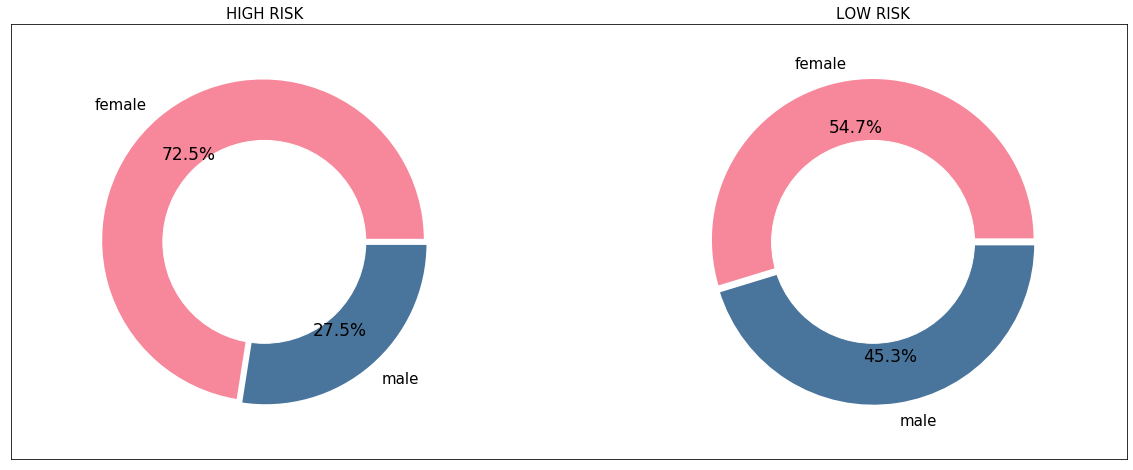

In [421]:
peopleh = high_risk['Gender'].value_counts() 
peoplel = low_risk['Gender'].value_counts() 

fig = plt.figure(figsize=(20,8))
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(peopleh,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
plt.title('HIGH RISK',weight=10,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes


# second pie-plot
ax1 = fig.add_subplot(122)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(peoplel,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
plt.title('LOW RISK',weight=10,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes